# Basic KNN

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [5]:
data = pd.read_csv("/content/drive/My Drive/dataset_aaic/demo_data/3.concertriccir2.csv", names = ['x', 'y', 'class'])
data.head()

,x,y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


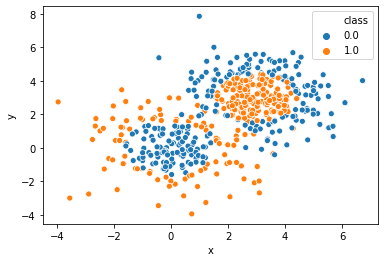

In [6]:
# visualizing the dataset
sns.scatterplot(x = data['x'], y = data['y'], hue = data['class'])

In [9]:
x = np.array(data.iloc[:, 0:2])
y = np.array(data['class'])

In [12]:
# Creating train, test, data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [13]:
# Model fitting for 1 Nearest Neighbour( 1-NN )
knn = KNeighborsClassifier(n_neighbors = 1,weights = 'distance', n_jobs = -1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='distance')

In [17]:
# Prediction, Accuracy for 1-NN
pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, pred, normalize=True)
print("The Accuracy for 1-NN is : ",accuracy)

The Accuracy for 1-NN is :  0.86


# KNN with N-Nearest Neighbours

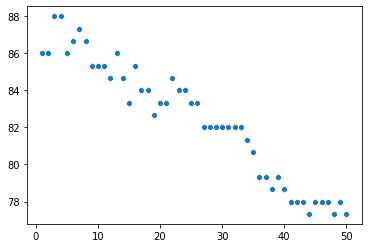

In [35]:
# 1 to 50 NN 
data = pd.read_csv("/content/drive/My Drive/dataset_aaic/demo_data/3.concertriccir2.csv", names = ['x', 'y', 'class'])
x = np.array(data.iloc[:, 0:2])
y = np.array(data['class'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
acc_score = []
for i in range(1,51):
  knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance', n_jobs = -1)
  knn.fit(x_train, y_train)
  pred = knn.predict(x_test)
  acc = accuracy_score(y_test, pred, normalize = True)
  acc_score.append(acc*100)
sns.scatterplot(x = np.arange(1,51), y = np.array(acc_score))  
# From the below graph we found that the optimal k for this dataset is 3 so we use 3-NN

# Basic KNN with cross_validation

In [37]:
# Loading data
data = pd.read_csv("/content/drive/My Drive/dataset_aaic/demo_data/3.concertriccir2.csv", names = ['x', 'y', 'class'])
x = np.array(data.iloc[:, 0:2])
y = np.array(data['class'])

# Splitting data into train, cross_validate, test

x_tr1, x_test, y_tr1, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train, x_cv, y_train, y_cv = train_test_split(x_tr1, y_tr1, test_size = 0.3, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', n_jobs = -1)
knn.fit(x_train, y_train)
pred = knn.predict(x_cv)
cv_acc = accuracy_score(y_cv, pred, normalize = True)
print(cv_acc)

0.9238095238095239


In [38]:
# now as it is a basic knn we use the same 1-NN 
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'distance', n_jobs = -1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test, pred, normalize = True)
print("The accurace of this model on 1-NN is : {}".format(acc))

The accurace of this model on 1-NN is : 0.8733333333333333


# KNN with N-Nearest Neighbours using Cross_validation

In [39]:
# Loading data
data = pd.read_csv("/content/drive/My Drive/dataset_aaic/demo_data/3.concertriccir2.csv", names = ['x', 'y', 'class'])
x = np.array(data.iloc[:, 0:2])
y = np.array(data['class'])

# Splitting data into train, cross_validate, test

x_tr1, x_test, y_tr1, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train, x_cv, y_train, y_cv = train_test_split(x_tr1, y_tr1, test_size = 0.3, random_state = 42)
cv_score = []
for i in range(1, 51):
  knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance', n_jobs = -1)
  knn.fit(x_train, y_train)
  pred = knn.predict(x_cv)
  cv_acc = accuracy_score(y_cv, pred, normalize = True)
  cv_score.append(cv_acc)

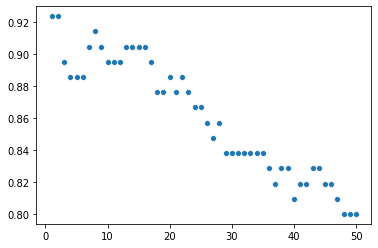

In [40]:
sns.scatterplot(x = np.arange(1,51), y = np.array(cv_score)) 

In [41]:
# from the above graph 1-NN is giving more accuracy now lets find the Test accuracy
test_score = []
for i in range(1, 51):
  knn = KNeighborsClassifier(n_neighbors = i, weights = 'distance', n_jobs = -1)
  knn.fit(x_train, y_train)
  pred = knn.predict(x_test)
  acc = accuracy_score(y_test, pred, normalize = True)
  test_score.append(acc)

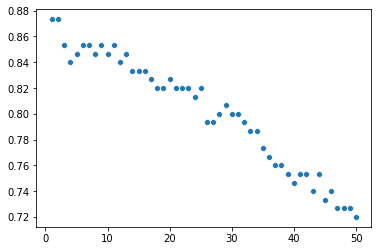

In [42]:
sns.scatterplot(x = np.arange(1,51), y = np.array(test_score)) 

In [44]:
print("Cross_validaton accuracy for 1-NN is {} and Test accuracy for 1-NN is {}".format(cv_score[0], test_score[0]))

Cross_validaton accuracy for 1-NN is 0.9238095238095239 and Test accuracy for 1-NN is 0.8733333333333333


# K-Fold Cross_validation

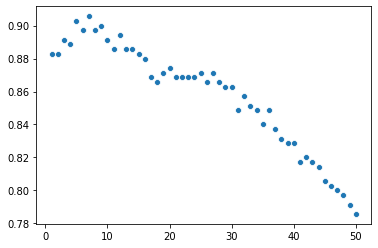

In [51]:
# Loading data
data = pd.read_csv("/content/drive/My Drive/dataset_aaic/demo_data/3.concertriccir2.csv", names = ['x', 'y', 'class'])
x = np.array(data.iloc[:, 0:2])
y = np.array(data['class'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
score = []
for i in range(1,51):
  knn = KNeighborsClassifier(n_neighbors = i, weights = "distance", n_jobs = -1)
  score1 = cross_val_score(knn, x_train, y_train, cv = 10)
  score.append(score1.mean())
sns.scatterplot(x = np.arange(1,51), y = np.array(score)) 

In [57]:
max_value = max(score)
score.index(max_value)+1

7

In [63]:
# From the above k-Fold cross_validation we get k = 7 so we use 7-NN
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', n_jobs = -1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test, pred, normalize = True)
print("The accuracy of the model when k = 7 is : {}".format(acc*100))

The accuracy of the model when k = 7 is : 87.33333333333333
